## **Packages**

- **| Tweepy |** :- Tweepy is an open source Python package that gives you a very convenient way to access the Twitter API with Python.


- **| TextBlob |** :- TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

- **| WordCloud |** :- WordCloud package is used to create a word cloud, also referred as text cloud or tag cloud, which is a visual representation of text data.

- **| pandas |** :- Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. 

- **| numpy |** :- NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

- **| re |** :- A regular expression (or 're') specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression.

- **| matplotlib |** :- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [133]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## **Keys**

1.  To use the twitter API, sign up for a developer account. Visit [link](https://developer.twitter.com/en/support/twitter-api/developer-account) for help.

2. Add an App. Visit [link text](https://medium.com/@divyeshardeshana/create-twitter-developer-account-app-4ac55e945bf4) for help.

3. Get the keys by clicking the "key" symbol next to your app.

4. Copy the keys to some notepad. Note that ConsumerKey= APIKey.

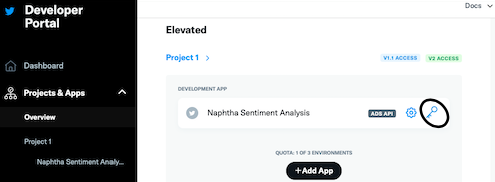

In [134]:
#copy and paste the consumer/api public key here
consumerKey=  'XXXXXXXXXX'

#copy and paste the consumer/api secret/private key here
consumerSecret= 'XXXXXXXXXX' 

#copy and paste the public access token here
accessToken=  'XXXXXXXXXX'

#copy and paste the private/secret access token here
accessTokenSecret=  'XXXXXXXXXX'

## **Authentication**

- The access of the app is needed to be changed from 'Essential' to 'Elevated' in order to use the tweepy package.

- To do so, go to Products>TwitterAPIv2>Elevated and apply an elevated access. Note, it takes time to get elevated access, took around 20 minutes in my case.

- To know more visit [link](https://developer.twitter.com/en/support/twitter-api/v2).

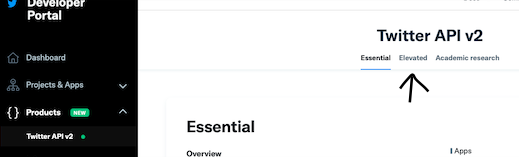

In [135]:
#Authorising Handler
authenticate= tweepy.OAuthHandler(consumerKey, consumerSecret)

#Authenticating Access Token
authenticate.set_access_token(accessToken, accessTokenSecret)

#Establishing API connection
api= tweepy.API(authenticate, wait_on_rate_limit=True)

## **Extracting Tweets**

Importing latest 100 (count=100) from PolymerUpdate (screen_name="POLYMERUPDATE") twitter handle.

In [136]:
#Generating request for tweets
tweets= api.user_timeline(screen_name="POLYMERUPDATE", count=100, lang="en", tweet_mode="extended")

#Printing recent five tweets
print("Recent tweets : \n")
i=1
for tweet in tweets[0:5]:
  print(str(i)+") "+tweet.full_text + "\n")
  i+=1

Recent tweets : 

1) #Methanol prices edge higher in the USA                    
.
To read the article, visit: https://t.co/fVWA0oVf2C
.
#polymernews #USAmarket https://t.co/KPA7uvWrPs

2) #Benzene prices drift lower in the USA               
.
To read the article, visit: https://t.co/d79247Rv6J
.
#polymernews #USAmarket https://t.co/9tNfcyoVHI

3) #SM prices quote higher in the USA                  
.
To read the article, visit: https://t.co/1bIA0EeaJn
.
#polymernews #USAmarket https://t.co/VQDTMfjrYY

4) #MX prices gain in the USA                 
.
To read the article, visit: https://t.co/ygoCkoCzIT
.
#polymernews #USAmarket https://t.co/h20IEwcawO

5) #Crude oil prices edge lower last Friday
.
.
Watch Now: https://t.co/KA61wMmbYM
.
.
#CrudeOil #Naphtha



## **Creating Dataframe**

In [137]:
#Creating a pandas dataframe to store all the tweets
df= pd.DataFrame(data= [tweet.full_text for tweet in tweets], columns= ['Tweets'])

df.head()

,Tweets
0,#Methanol prices edge higher in the USA ...
1,#Benzene prices drift lower in the USA ...
2,#SM prices quote higher in the USA ...
3,#MX prices gain in the USA \n....
4,#Crude oil prices edge lower last Friday\n.\n....


## **Cleaning Text**

The tweets contain several unwanted elements that is required to be remove. Regular Expressions are used to do this job. Elements like hastags, attags, weblinks, etc. doesn't add value to the analysis and therefore it is good to remove them.

In [138]:
#function to remove unwanted text
def cleanText(text):
  #removing @ tags
  text= re.sub(r'@[A-Za-z0-9]+',"",text)

  #removing hastags
  text= re.sub(r'#',"",text)

  #removing RT/RTs (ReTweets)
  text= re.sub(r'RT[\s]+',"",text)

  #removing weblink
  text= re.sub(r'https?:\/\/\S+',"",text)

  #removing unwanted or repeating words
  text= re.sub('To read the article, visit:',"",text)
  text= re.sub('Read full article :',"",text)
  text= re.sub('PolymerNews',"",text)
  text= re.sub('polymernews',"",text)
  text= re.sub('USAmarket',"",text)
  text= re.sub('Europemarket',"",text)
  text= re.sub('Watch Now:',"",text)
  text= re.sub('CrudeOil Naphtha',"",text)
  return text

#applying the clean text function to all the tweets
df['Tweets']= df['Tweets'].apply(cleanText)

## **Subjectivity & Polarity**

- Polarity of an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration. It ranges from -1 to 1; where -1 is very negetive and +1 is very positive

- Facts are objective expressions about entities, events and their properties. Opinions are usually subjective expressions that describe people's sentiments, appraisals or feelings toward entities, events and their properties. Subjectivity ranges from 0 to 1; 0 being completely factual and 1 being completely personal.

In [139]:
#function to get the subjectivity of a tweet using textblob package
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function to get the polarity of a tweet using textblob package
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#creating two new column that will store the subjectivity and objectivity of all tweets
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

## **Word Cloud**

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

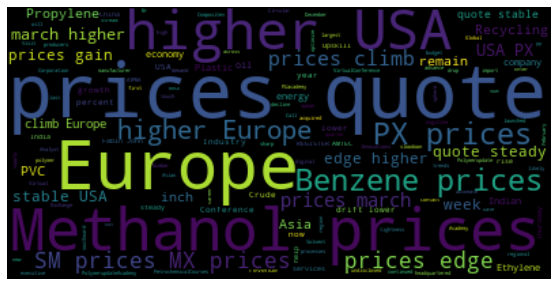

In [140]:
#joining all the tweets to create a text corpus
allWords= ''.join([twt for twt in df['Tweets']])

#generating the word cloud using the WordCloud package
wordCloud= WordCloud(random_state=20, max_font_size=120).generate(allWords)

#plotting the text cloud
plt.figure(figsize=(10,5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Analysis Sentiment**

In [141]:
#function to get the sentiment of a tweet using the polarity of that tweet
def getAnalysis(score):
  if score<0:
    return "Negative"
  elif score==0:
    return "Neutral"
  else:
    return "Positive"

#creating a new column in the dataframe which will store whether a tweet is positive, neutral or negative
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,Methanol prices edge higher in the USA ...,0.500000,0.25,Positive
1,Benzene prices drift lower in the USA ...,0.000000,0.00,Neutral
2,SM prices quote higher in the USA ...,0.500000,0.25,Positive
3,MX prices gain in the USA \n.\...,0.000000,0.00,Neutral
4,Crude oil prices edge lower last Friday\n.\n.\...,0.533333,-0.35,Negative
5,PX prices inch higher in Europe \n.\n \n.\n,0.500000,0.25,Positive
6,Benzene prices climb in Europe \n.\n \n.\n,0.000000,0.00,Neutral
7,Helen McGeough - Senior Analyst and Global Ana...,0.000000,0.00,Neutral
8,Solvent MX prices quote higher in Europe ...,0.500000,0.25,Positive
9,Methanol prices march higher in Europe ...,0.500000,0.25,Positive


## **Printing Positive Tweets**

In [142]:
#printing all the positive tweets; most positive tweets being on top
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i]== 'Positive':
    print(f"{j}) {sortedDF['Tweets'][i]}".replace(".","").strip())
    print()
    j+=1


1) Methanol prices edge higher in the USA

2) SM prices quote higher in the USA

3) PX prices inch higher in Europe

4) Solvent MX prices quote higher in Europe

5) Methanol prices march higher in Europe

6) SM prices remain steady in the USA

7) PX prices quote steady in Europe

8) Benzene prices quote steady in Europe

9) Methanol prices quote higher in Europe

10) The public sector oil major Indian Oil Corporation (IOC) has acquired a 493 percent stake in Indian Gas Exchange (IGX) from Indian Energy Exchange (IEX) at an undisclosed sum

11) Methanol prices quote higher in the USA

12) Benzene prices edge higher in the USA

13) MX prices inch higher in the USA

14) Polyvinyl chloride (PVC) pipes and fittings manufacturers are likely to post around a 30 percent surge in their revenues for the financial year 2021-22 on higher realizations and modest volume growth

15) Stepping up monetary easing efforts, China’s central bank cut its benchmark lending rates on Thursday, for the first ti

## **Printing Negative Tweets**

In [143]:
#printing all the negative tweets in order of negativity
j=1
sortedDF= df.sort_values(by=['Polarity'],ascending=False)
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i]== 'Negative':
    print(f"{j}) {sortedDF['Tweets'][i]}".replace(".","").strip())
    print()
    j+=1


1) Crude oil prices edge lower last Friday

2) Crude oil prices hit eight-year high on supply tightness and geo-political tensions

3) PVC price shrinks on slow offtake and expected cut in import duty

4) Brent crude prices climb on Monday

5) Adani Group inks pact with South Korea’s Posco for green energy projects in India

6) Crude Oil Prices Edge Lower On Thursday

7) Open spec naphtha prices firm up in Asia on Wednesday



## **Visuals**

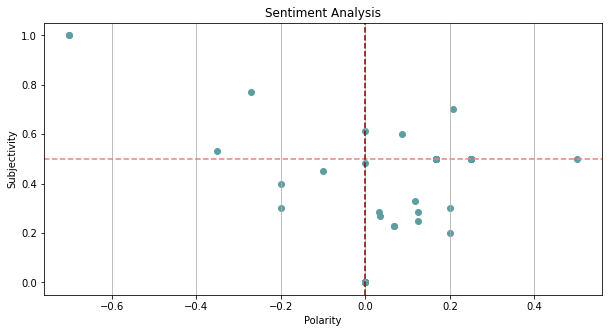

In [144]:
#scatter plot of subjectivity and polarity of the tweets
plt.figure(figsize=(10,5))

plt.scatter(df['Polarity'],df['Subjectivity'], color='#5f9ea0' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.grid(axis = 'x')

plt.axhline(y = 0.5, color = 'lightcoral', linestyle = '--')
plt.axvline(x = 0, color = 'darkred', linestyle = '--')

plt.show()

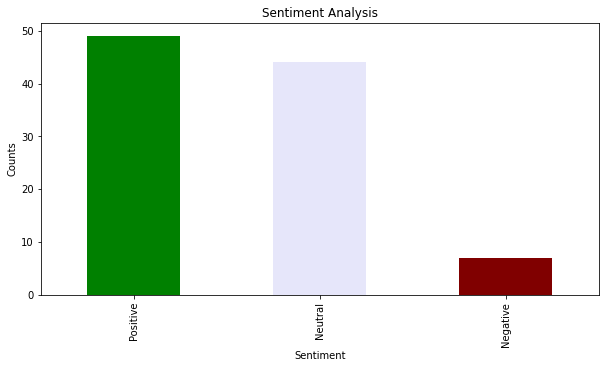

In [145]:
#Histogram representing number of positive, neutral, and negative tweets
plt.figure(figsize=(10,5))

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar', color=['green', 'lavender', 'maroon'])

plt.show()